1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
from scipy import linalg as la
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
n = 1000
x1 = np.random.normal(0, 1, n)
x2 = x1 + np.random.normal(0, 3, n)
x3 = 2*x1 + x2

dataset = np.array([x1, x2, x3])

In [3]:
# 1)
cov = np.cov(dataset)
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues of the covariance matrix:\n", l, '\n')
print("Eigenvectors of the covariance matrix:\n", V, '\n')

Eigenvalues of the covariance matrix:
 [ 2.70055002e+01 -1.17561976e-15  1.87461594e+00] 

Eigenvectors of the covariance matrix:
 [[-0.12158213 -0.81649658  0.56440333]
 [-0.56966796 -0.40824829 -0.71331042]
 [-0.81283221  0.40824829  0.41549625]] 



In [4]:
# 2)
U, S, Vt = np.linalg.svd(dataset)
l_svd = S**2/(n-1)
V_svd = U
print("Eigenvalues SVD:\n", l_svd)
print("Eigenvectors SVD:\n", V_svd)

Eigenvalues SVD:
 [2.70963515e+01 1.87532884e+00 6.87271197e-30]
Eigenvectors SVD:
 [[-0.1214017   0.56444217 -0.81649658]
 [-0.56989595 -0.71312828 -0.40824829]
 [-0.81269935  0.41575606  0.40824829]]


In [5]:
# 3)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

Lambda:
 [[ 2.70055002e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.17561976e-15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.87461594e+00]] 

Trace(A):
 28.880116131901197 

Trace(Lambda):
 28.880116131901193 



In [6]:
# 4)
transpose_U = U.T
Xp = np.dot(transpose_U, dataset)

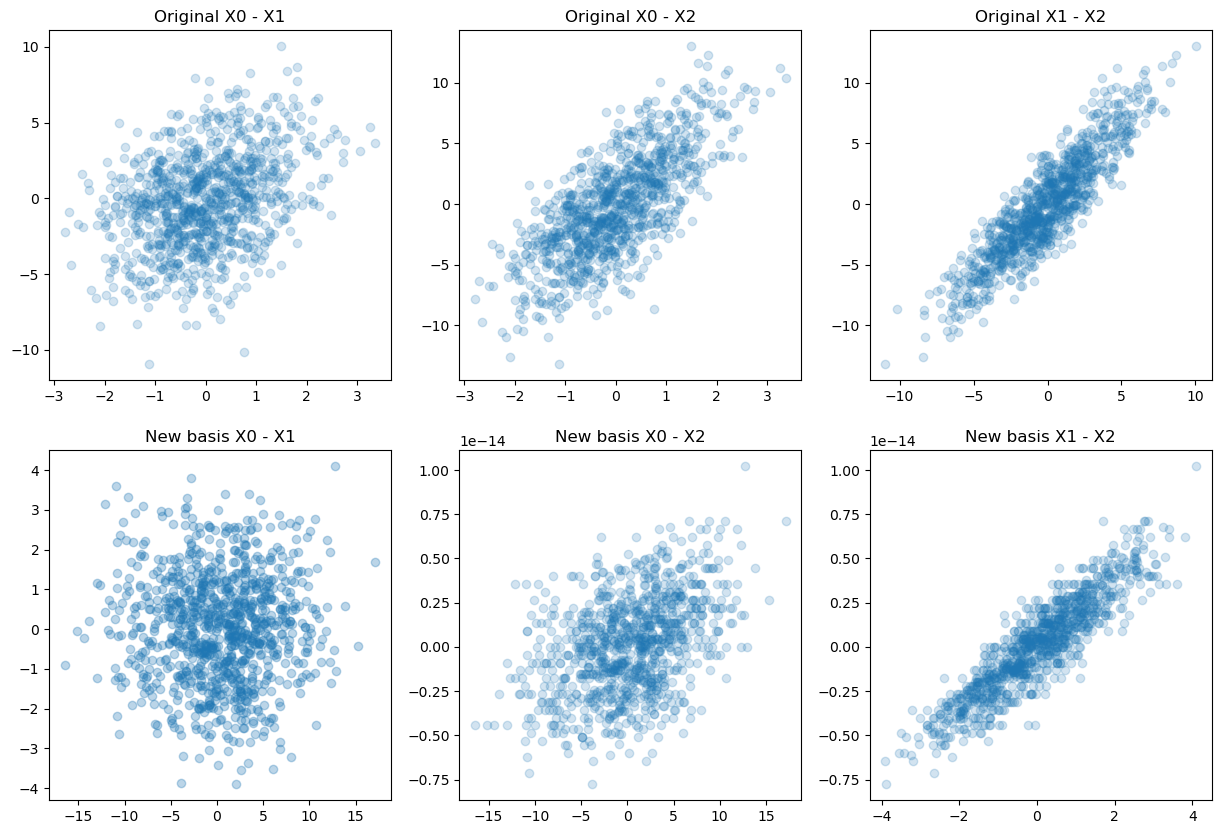

In [7]:
# 5)
fig = plt.figure(figsize=(15,10))

plt.subplot(2, 3, 1)
plt.title("Original X0 - X1")
plt.scatter(dataset[0,:], dataset[1,:], alpha=0.2)

plt.subplot(2, 3, 2)
plt.title("Original X0 - X2")
plt.scatter(dataset[0,:], dataset[2,:], alpha=0.2)

plt.subplot(2, 3, 3)
plt.title("Original X1 - X2")
plt.scatter(dataset[1,:], dataset[2,:], alpha=0.2)

plt.subplot(2, 3, 4)
plt.title("New basis X0 - X1")
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.3)

plt.subplot(2, 3, 5)
plt.title("New basis X0 - X2")
plt.scatter(Xp[0,:], Xp[2,:], alpha=0.2)

plt.subplot(2, 3, 6)
plt.title("New basis X1 - X2")
plt.scatter(Xp[1,:], Xp[2,:], alpha=0.2)
plt.show()

In [8]:
print("The percentual of dataset variability :"+ str(np.real(np.sum(l[:2])/np.sum(l))*100))

The percentual of dataset variability :93.50897367983825


2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [9]:
noise = []
for i in range(10):
    noise.append(np.random.rand(n)/20)
dataset_nd = np.vstack([dataset, [i for i in noise ]])

In [10]:
# 1)
cov_nd = np.cov(dataset_nd)
l_nd, V_nd = la.eig(cov_nd)
l_nd = np.real_if_close(l_nd)

print("Eigenvalues of the covariance matrix:\n", l_nd, '\n')
print("Eigenvectors of the covariance matrix:\n", V_nd, '\n')

Eigenvalues of the covariance matrix:
 [2.70055026e+01 1.87461830e+00 5.72247584e-16 2.45988746e-04
 1.73902102e-04 2.32402059e-04 1.86790172e-04 1.96271843e-04
 2.18191723e-04 2.14533358e-04 2.03012796e-04 2.10165026e-04
 2.07552718e-04] 

Eigenvectors of the covariance matrix:
 [[-1.21582113e-01 -5.64402998e-01 -8.16496581e-01 -2.16309130e-04
   1.00719299e-04 -6.60295272e-05 -4.66599116e-04  2.30506254e-04
  -4.02151719e-05  1.37112843e-04  1.52846279e-04 -5.14146066e-05
   3.38232067e-06]
 [-5.69667943e-01  7.13309857e-01 -4.08248290e-01  3.33703166e-04
  -2.45654394e-04  1.68928978e-05  6.82822469e-04 -3.12297183e-04
   1.42085194e-05 -1.12926879e-04 -2.12955834e-04  1.22528830e-04
  -8.89492384e-05]
 [-8.12832169e-01 -4.15496140e-01  4.08248290e-01 -9.89150945e-05
  -4.42157958e-05 -1.15166157e-04 -2.50375764e-04  1.48715325e-04
  -6.62218244e-05  1.61298807e-04  9.27367238e-05  1.96996170e-05
  -8.21845971e-05]
 [-1.79190218e-04  9.43604911e-05 -1.25773072e-15 -4.24319411e-01
  

In [11]:
# 2)
U_nd, S_nd, Vt_nd = np.linalg.svd(dataset_nd)
l_svd_nd = S_nd**2/(n-1)
V_svd_nd = U_nd
print("Eigenvalues SVD:\n", l_svd_nd)
print("Eigenvectors SVD:\n", V_svd_nd)

Eigenvalues SVD:
 [2.70963749e+01 1.87533225e+00 6.43359695e-03 2.44343421e-04
 2.30838131e-04 2.17663711e-04 2.11303109e-04 2.10138349e-04
 2.03896708e-04 2.02717031e-04 1.86819377e-04 1.73915099e-04
 6.82869685e-30]
Eigenvectors SVD:
 [[-1.21401610e-01  5.64441769e-01  3.52146428e-04 -1.88925879e-04
   7.37197411e-05 -7.17161044e-05 -1.28880370e-04  6.82169158e-05
  -8.01436694e-05  2.36589208e-04  4.56222292e-04  9.58001816e-05
   8.16496581e-01]
 [-5.69895752e-01 -7.13127080e-01 -1.08019962e-03  3.07739713e-04
  -3.55986288e-05  4.21152905e-05  7.46442572e-05 -1.29268541e-04
   1.49370848e-04 -3.44635174e-04 -6.69421043e-04 -2.39174474e-04
   4.08248290e-01]
 [-8.12698972e-01  4.15756459e-01 -3.75906766e-04 -7.01120449e-05
   1.11840853e-04 -1.01316918e-04 -1.83116482e-04  7.16529046e-06
  -1.09164906e-05  1.28543242e-04  2.43023540e-04 -4.75741108e-05
  -4.08248290e-01]
 [ 9.18975797e-05  2.52864308e-04 -3.08758677e-01 -3.77151888e-01
  -1.97425017e-01  2.05481341e-01  2.14680811e

In [12]:
# 3)
Lambda_nd = np.diag(l_nd)
print("Lambda:\n", Lambda_nd, '\n')
print("Trace(A):\n", cov_nd.trace(), '\n')
print("Trace(Lambda):\n", Lambda_nd.trace(), '\n')

Lambda:
 [[2.70055026e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.87461830e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.72247584e-16 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 2.45988746e-04
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.73902102e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00

In [13]:
# 4)
transpose_U_nd = U_nd.T
Xp = np.dot(transpose_U_nd, dataset_nd)

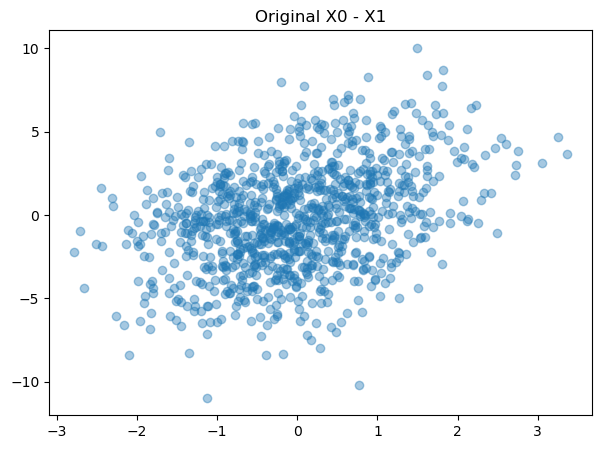

In [14]:
# 5)
fig = plt.figure(figsize=(7,5))
plt.title("Original X0 - X1")
plt.scatter(dataset_nd[0,:], dataset_nd[1,:], alpha=0.4)

In [15]:
print("The percentual of dataset variability :"+ str(np.real(np.sum(l_nd[:12])/np.sum(l_nd))*100))

The percentual of dataset variability :99.99928138213981


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [16]:
# get the dataset and its description on the proper data directory
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

--2024-01-19 00:30:15--  https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: 'data/magic04.data'

     0K .......... .......... .......... .......... ..........  110K
    50K .......... .......... .......... .......... ..........  214K
   100K .......... .......... .......... .......... ..........  629K
   150K .......... .......... .......... .......... ..........  270K
   200K .......... .......... .......... .......... ..........  298K
   250K .......... .......... .......... .......... .......... 1,05M
   300K .......... .......... .......... .......... ..........  182K
   350K .......... .......... .......... .......... .......... 6,92M
   400K .......... .......... .......... .......... ..........  254K
   450K ..........

In [17]:
df = pd.read_csv("data/magic04.data", names = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class'])
df = df.drop(['class'], axis=1).T
df.head(15)

,0,1,2,3,4,5,6,7,8,9,...,19010,19011,19012,19013,19014,19015,19016,19017,19018,19019
fLength,28.7967,31.6036,162.0520,23.8172,75.1362,51.6240,48.2468,26.7897,96.2327,46.7619,...,32.4902,79.5528,31.8373,182.5003,43.2980,21.3846,28.9452,75.4455,120.5135,187.1814
fWidth,16.0021,11.7235,136.0310,9.5728,30.9205,21.1502,17.3565,13.7595,46.5165,15.1993,...,10.6723,44.9929,13.8734,76.5568,17.3545,10.9170,6.7020,47.5305,76.9018,53.0014
fSize,2.6449,2.5185,4.0612,2.3385,3.1611,2.9085,3.0332,2.5521,4.1540,2.5786,...,2.4742,3.5488,2.8251,3.6872,2.8307,2.6161,2.2672,3.4483,3.9939,3.2093
fConc,0.3918,0.5303,0.0374,0.6147,0.3168,0.2420,0.2529,0.4236,0.0779,0.3377,...,0.4664,0.1656,0.4169,0.1123,0.2877,0.5857,0.5351,0.1417,0.0944,0.2876
fConc1,0.1982,0.3773,0.0187,0.3922,0.1832,0.1340,0.1515,0.2174,0.0390,0.1913,...,0.2735,0.0900,0.1988,0.0666,0.1646,0.3934,0.2784,0.0549,0.0683,0.1539
fAsym,27.7004,26.2722,116.7410,27.2107,-5.5277,50.8761,8.5730,29.6339,110.3550,24.7548,...,-27.0097,-39.6213,-16.4919,192.2675,-60.1842,15.2618,37.0816,-9.3561,5.8043,-167.3125
fM3Long,22.0110,23.8238,-64.8580,-6.4633,28.5525,43.1887,38.0957,20.4560,85.0486,43.8771,...,-21.1687,53.7866,-27.1448,93.0302,-33.8513,11.5245,13.1853,41.0562,-93.5224,-168.4558
fM3Trans,-8.2027,-9.9574,-45.2160,-7.1513,21.8393,9.8145,10.5868,-2.9292,43.1844,-6.6812,...,8.4813,-30.0054,11.1098,-62.6192,-3.6545,2.8766,-2.9632,-9.4662,-63.8389,31.4755
fAlpha,40.0920,6.3609,76.9600,10.4490,4.6480,3.6130,4.7920,0.8120,4.8540,7.8750,...,69.1730,15.8075,11.3663,82.1691,78.4099,2.4229,86.7975,30.2987,84.6874,52.7310
fDist,81.8828,205.2610,256.7880,116.7370,356.4620,238.0980,219.0870,237.1340,248.2260,102.2510,...,120.6680,311.5680,100.0566,283.4731,224.8299,106.8258,247.4560,256.5166,408.3166,272.3174


In [18]:
cov = np.cov(df)
l, V = la.eig(cov)
l = np.real_if_close(l)

print("Eigenvalues of the covariance matrix:\n", l, '\n')
print("Eigenvectors of the covariance matrix:\n", V, '\n')

Eigenvalues of the covariance matrix:
 [6.57979140e+03 3.85387048e+03 2.01638313e+03 1.32675968e+03
 6.10187259e+02 4.33599171e+02 1.17330074e+02 8.63965822e-02
 1.07363851e-02 3.85322859e-04] 

Eigenvectors of the covariance matrix:
 [[ 3.27812305e-01  1.34406332e-01 -6.55078481e-02 -8.63988253e-01
  -9.45511967e-02 -1.98552026e-02  3.38166662e-01  3.99907112e-03
  -4.54836725e-04  4.57080123e-05]
 [ 1.13810001e-01  5.38837224e-02  1.89938175e-02 -3.19766485e-01
   1.97548493e-02  2.32592322e-02 -9.38307839e-01  1.33847863e-02
   6.74902809e-04 -5.73158421e-05]
 [ 3.06076690e-03 -6.59372017e-04 -1.05931761e-03 -6.93028658e-03
  -2.65185255e-03  1.33441545e-04 -1.08823228e-02 -9.27765187e-01
  -3.72229862e-01  2.26331399e-02]
 [-9.27109146e-04  2.58205308e-04  5.10399700e-04  2.60555110e-03
   1.53899865e-03 -3.46437681e-05  3.06287144e-03  3.22020557e-01
  -7.69222364e-01  5.51887659e-01]
 [-5.21882399e-04  1.52710005e-04  2.94635944e-04  1.51275933e-03
   9.19340567e-04 -2.21501607e-

In [19]:
for i in range(len(df)):
    print("The percentual of dataset variability using "+str(i)+" components: "+ str(np.real(np.sum(l[:i])/np.sum(l))*100))

The percentual of dataset variability using 0 components: 0.0
The percentual of dataset variability using 1 components: 44.04728315643291
The percentual of dataset variability using 2 components: 69.84635702474034
The percentual of dataset variability using 3 components: 83.34468747519854
The percentual of dataset variability using 4 components: 92.22645221247787
The percentual of dataset variability using 5 components: 96.31124599383492
The percentual of dataset variability using 6 components: 99.21390115548266
The percentual of dataset variability using 7 components: 99.99934718055896
The percentual of dataset variability using 8 components: 99.9999255476364
The percentual of dataset variability using 9 components: 99.99999742052232


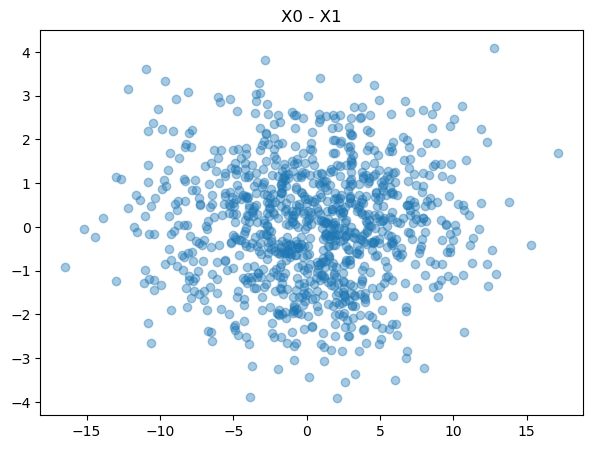

In [20]:
Xp = np.dot(U.T, dataset)

fig = plt.figure(figsize=(7,5))
plt.title("X0 - X1")
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.4)